# Machine Learning 

### Zhentao Shi

<img src="graph/Ada_Lovelace.jpg" width="800">

<img src="graph/Lord_Byron.jpg" width="800">

To Lord Byron, from Ada

(by MS Copilot)

You were the bard of passion and of fire
The one who sang of freedom and desire
But you were also the source of my regret
The one who left me with a heavy debt

You never saw me as your daughter true
You never cared for what I could pursue
You never praised me for my skill and art
You never valued my poetic heart

You gave me only half your noble name
And half your restless spirit that I claim
But you also gave me half your curse
And half your madness that I must disperse

You were the scourge of tyrants and of kings
The one who dared to fly with broken wings
But you were also the slave of your own lust
The one who broke the hearts of those who trust

You lived a life of glory and of fame
You died a martyr in a foreign game
But you also left a trail of sin and woe
And a riddle that I long to know

You are the father I can never meet
The one who haunts me in my every beat
But you are also the muse I can't deny
The one who spurs me to create and try

You are the bard of passion and of fire
And I am the bard of logic and of wire

## Introduction

Machine learning and artificial intelligence:

* Technology or alchemy?
* Statistics or biology?

* [Tom Sargent](https://www.project-syndicate.org/commentary/artificial-intelligence-new-economic-models-by-thomas-j-sargent-2019-11)


## Reference

* [ISLR] James, Gareth., Witten, Daniela., Hastie, Trevor., & Tibshirani, Robert. (2017). An introduction to statistical learning.  (Open access at https://www.statlearning.com/)

* Athey (2018) 
* Mullainathan and Spiess (2017)

## Supervised Learning

* Connection between $X$ and $Y$
* Regression and classification

A set of data fitting procedures focusing on out-of-sample prediction
* Repeat a scientific experiment for $n$ times and obtain a dataset $(y_i, x_i)_{i=1}^n$.
* How to best predict $y_{n+1}$ given $x_{n+1}$?

# Unsupervised Learning

* Only about $X$
* Density estimation, principal component analysis, and clustering


# Conventional Statistics

* Consistency
* Asymptotic distribution (hopefully normal)
* Efficiency

# Machine Learning's Responses

* Efficiency is mostly irrelevant given big data
* Statistical inference may not be the goal
    * Recommendation system on Amazon or Taobao
    * Care about the prediction accuracy, not the causal link
* Is there a data generating process (DGP)?

# First Generation

## Nonparametric Estimation

* *Parametric*: a finite number of parameters
* *Nonparametric*: an infinite number of parameters

* Some ideas in nonparametric estimation is directly related to machine learning

# Example: Density Estimation

* Density estimation given a sample $(x_1,\ldots,x_n)$
* If drawn from a parametric family, MLE for estimation
* Misspecification 

* Histogram is nonparametric
    * If grid too fine, small bias but large variance
    * If grid too coarse, small variance but large bias
    

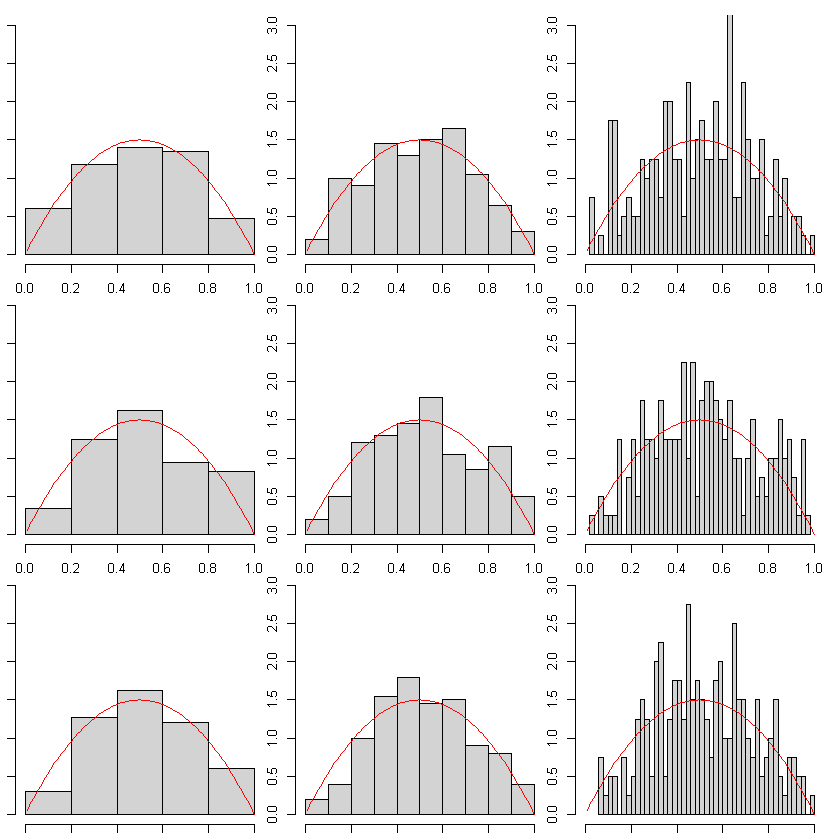

In [1]:
n <- 200

par(mfrow = c(3, 3))
par(mar = c(1, 1, 1, 1))

x_base <- seq(0.01,1,by = 0.01)
breaks_list = c(4, 12, 60)

for (ii in 1:3){
  x <- rbeta(n, 2, 2) # beta distribution
  for ( bb in breaks_list){
    hist(x, breaks = bb, main="", freq = FALSE, ylim = c(0,3),xlim = c(0,1))
    lines( y = dbeta( x_base, 2, 2), x = x_base , col = "red" )
  }
}


## Variance-Bias Tradeoff

![](graph/bias_variance.png)

### Example: Conditional Mean

* Conditional mean $$f(x) = E[y_i |x_i = x]$$ given a sample $(y_i, x_i)$. 
* Solve 
$$
\min_f E[ (y_i - f(x_i) )^2 ]
$$
* In general $f(x)$ is a nonlinear function.

* Restrict the class of functions to search for minimizer
    * Assume differentiability
* One way is kernel method based on density estimation

# Series Estimation

* Series expansion to approximate $f(x)$
* Generates many additive regressors
    * Ex: bounded, continuous and differentiate function has a series
representation $f(x) = \sum_{k=0}^{\infty} \beta_k \cos (\frac{k}{2}\pi x )$.
    * In finite sample, choose a finite $K$, usually much smaller than $n$
    * Asymptotically $K \to \infty$ as $n \to \infty$ so that
$$
f_K(x) = \sum_{k=0}^{K} \beta_k \cos \left(\frac{k}{2}\pi x \right) \to f(x).
$$

* Bias-variance trade-off
    * Big $K$: small bias and large variance 
    * Small $K$: small variance and large bias

# Regularization

* Specify a sufficiently large $K$, and then add a penalty term to control the complexity
* Eg: *Ridge regression*: 
$$
\min_\beta \  \frac{1}{2n}  \sum_{i=1}^n \left(y_i - \sum_{k=0}^{K} \beta_k f_k(x_i) \right)^2
+ \lambda \sum_{k=0}^K \beta_k^2,
$$
where $\lambda$ is the tuning parameter such that $\lambda \to 0$ as $n\to \infty$, and
$f_k(x_i) = \cos \left(\frac{k}{2}\pi x_i \right)$. 

In compact notation, let $Y=(y_1,\ldots,y_n)'$ and
$X = (X_{ik} = f_k(x_i) )$, the above problem can be written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_2 ^2
$$

# Tuning Parameter

* *Information criterion*: AIC, BIC
* *Cross validation*


* Active statistical research, but has little economics

# Econometrics Workflow

![](graph/metric_flow.png)

## Data Splitting

![ ](graph/ML_flow.png)

## Data Splitting


* Machine learning's main purpose is often prediction
* Agnostic about the DGP.
* Models are measured by their performance in prediction.
* Tuning.

* Training dataset
* Validation dataset

* Testing sample

# `Caret` Package

* R package `caret` (Classification And REgression Training): a framework for many machine learning methods
* The function [`createDataPartition`](https://topepo.github.io/caret/data-splitting.html)
splits the sample for both cross sectional data and time series.

### Cross Validation (cross sectional data)

* $S$-fold cross validation partitions the dataset into $S$ disjoint sections
* Each iteration picks one of the sections as the (quasi) validation sample
* The other $S-1$ sections as the training sample.
* Compute an out-of-sample goodness-of-fit measurement

### Goodness of Fit (Out of Sample)

* *Mean-squared prediction error* ${n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2$ where $val$ is the validation set and $n_v$ is its cardinality, 
* *Mean-absolute prediction error* ${n_v}^{-1}\sum_{i \in val} |y_i - \hat{y}_i|$. 
* *Out of sample R-squared* (OOS $R^2$):

$$
1 - \frac{{n_v}^{-1} \sum_{i \in val} (y_i - \hat{y}_i)^2}{{n_v}^{-1} \sum_{i \in val} y_i^2}
$$

* Repeat this process for $S$ times so that each of the $S$ sections are treated as the validation sample, 
* Average the goodness-of-fit measurement over the $S$ sections to determined the best tuning parameter. 
* In practice we can use  $S=5$ for 10

### Cross Validation (time series data)

* In time series context, cross validation must preserve the dependence structure. 
* If the time series is stationary, we can partition the data into $S$ consecutive blocks. 


(i will skip this slide)

* If the purpose is forecasting, then we can use nested CV. 
![ ](graph/CV_Figure.png)

* Nested CV with fixed-length rolling window scheme
* The sub-training data can also be an extending rolling window.

## Variable Selection

* Number of covariates $x_i$ can be large.

* Conventional attitude: prior knowledge
* Recently economists wake up from the long lasting negligence.
    * Stock and Watson (2012): forecasting 143 US macroeconomic indicators.
    * A horse race of several variable selection methods.

# Lasso

* least-absolute-shrinkage-and-selection-operator
(Lasso) (Tibshirani, 1996)
* Penalizes the $L_1$ norm of the coefficients.
The criterion function of Lasso is written as
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \Vert \beta \Vert_1
$$
where $\lambda \geq 0$ is a tuning parameter. 

Lasso shrinks some coefficients exactly to 0, in a wide range of values of $\lambda$


![ ](graph/lasso_regression2.png)


# SCAD

* Smoothly-clipped-absolute-deviation (SCAD) Fan and Li (2001):
$$
(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \sum_{j=1}^d \rho_{\lambda}( |\beta_j| )
$$
where
$$
\rho_{\lambda}^{\prime} (\theta) = \lambda \left\{ 1\{\theta\leq \lambda \} +
\frac{(a\lambda - \theta)_+}{(a-1)\lambda} \cdot 1 \{\theta > \lambda\} \right\}
$$
for some $a>2$ and $\theta>0$. 

* SCAD enjoys *oracle property*. 


## Adaptive Lasso

*Adaptive Lasso* (Zou, 2006) also enjoys the oracle property.

Two-step algorithm:
1. First run a Lasso or ridge regression and save the estimator $\hat{\beta}^{(1)}$
2. Solve 
$(2n)^{-1} (Y-X\beta)'(Y-X\beta) + \lambda \sum_{j=1}^d  w_j |\beta_j|$
where $w_j = 1 /  |\hat{\beta}_j^{(1)} |^a$ and $a\geq 1$ is a constant. (Common choice is $a = 1$ or 2).


R packages

* `glmnet` or `LARS` implements Lasso
* `ncvreg` carries out SCAD. 
* Adaptive Lasso by setting the weight via the argument `penalty.factor` in `glmnet`.

### My Works on Lasso

* Shi (2016): GMM Lasso for IV
* Lee, Shi and Gao (2022): Adaptive Lasso
* Mei and Shi (2024): High-dimensional Lasso

In [ ]:
library(magrittr)
n <- 40
p <- 50
b0 <- c(rep(1, 10), rep(0, p - 10))
x <- matrix(rnorm(n * p), n, p)
y <- x %*% b0 + rnorm(n)

ols <- MASS::ginv(t(x) %*% x) %*% (t(x) %*% y) # OLS
# Implement Lasso by glmnet
cv_lasso <- glmnet::cv.glmnet(x, y)
lasso_result <- glmnet::glmnet(x, y, lambda = cv_lasso$lambda.min)

In [ ]:
# Get weights
b_temp <- as.numeric(lasso_result$beta)
b_temp[b_temp == 0] <- 1e-8
w <- 1 / abs(b_temp) # Let gamma = 1

# Implement Adaptive Lasso by glmnet
cv_alasso <- glmnet::cv.glmnet(x, y, penalty.factor = w)
alasso_result <-
  glmnet::glmnet(x, y, penalty.factor = w, lambda = cv_alasso$lambda.min)

In [ ]:
plot(b0, ylim = c(-0.8, 1.5), pch = 4, xlab = "", ylab = "coefficient")
points(lasso_result$beta, col = "red", pch = 6)
points(alasso_result$beta, col = "blue", pch = 5)
points(ols, col = "green", pch = 3)
 
# out of sample prediction
x_new <- matrix(rnorm(n * p), n, p)
y_new <- x_new %*% b0 + rnorm(n)
lasso_msfe <- (y_new - predict(lasso_result, newx = x_new)) %>% var()
alasso_msfe <- (y_new - predict(alasso_result, newx = x_new)) %>% var()
ols_msfe <- (y_new - x_new %*% ols) %>% var()

print(c(lasso_msfe, alasso_msfe, ols_msfe))

### DIY Lasso by `CVXR`. 


In [ ]:
library(CVXR)

lambda <- 2 * cv_lasso$lambda.min # tuning parameter

# CVXR for Lasso
beta_cvxr <- Variable(p)
obj <- sum_squares(y - x %*% beta_cvxr) / (2 * n) + lambda * p_norm(beta_cvxr, 1)
prob <- Problem(Minimize(obj))
lasso_cvxr <- solve(prob)
beta_cvxr_hat <- lasso_cvxr$getValue(beta_cvxr) %>% as.vector() %>% print()


# Stagewise Forward Selection

More methods are available if prediction of the response variables is the sole purpose of the regression.

Eg: *stagewise forward selection*

1. Start from an empty model. 
2. Given many candidate $x_j$, in each round we add the regressor that can
produce the biggest $R^2$. 

Close to the idea of *$L_2$ componentwise boosting*
which does not adjust the coefficients fitted earlier

* Shi and Huang (2023)


# Second Generation

# Prediction-Oriented Methods

* Methods that induces data-driven interaction of the covariates.
* Interaction makes the covariates much more flexible
* Insufficient theoretical understanding
* "Black-boxes" methods

* Surprisingly superior performance
* Industry insiders are pondering "alchemy"

# Regression Tree

* Supervised learning: $x \to y $
* Regression tree (Breiman, 1984) recursively partitions the space of the regressors
    * Each time a covariate is split into two dummies
    * Splitting criterion is aggressive reduction of the SSR
    * Tuning parameter is the depth of the tree
    * Given a dataset $d$ and the depth of the tree, the fitted tree $\hat{r}(d)$ is deterministic

- Example: Using longitude and latitude for Beijing housing price.

# Bagging

* Tree is unstable
* *Bootstrap averaging*, or *bagging*, reduces variance of trees (Breiman, 1996)
    * Grow a tree for each bootstrap sample
    * Simple average

* An example of the *ensemble learning*.

* Inoue and Kilian (2008): an early application of bagging in time series forecast.
* Hirano and Wright (2017): a theoretical perspective on the risk reduction of bagging.

# Random Forest

* *Random forest* (Breiman, 2001):
    * Draw a bootstrap sample
    * Before each split, shakes up the regressors by randomly sampling $m$ out of the total $p$ covarites. Stop until the depth of the tree is reached.
    * Average the trees over the bootstrap samples
    
* The tuning parameters are the tree depth and $m$
* More stable than bagging thanks to "de-correlation"

In [ ]:
require(randomForest)
require(MASS)#Package which contains the Boston housing dataset
attach(Boston)
set.seed(101)

#training Sample with 300 observations
train=sample(1:nrow(Boston),300)

Boston.rf=randomForest(medv ~ . , data = Boston, subset = train)
plot(Boston.rf)

# getTree(Boston.rf)
importance(Boston.rf)


* Consistency of random forest is not proved
until Scornet, Biau, and Vert (2015)
* Inferential theory was first established by
Wager Athey (2018)  in the context of treatment effect estimation
* Athey, Tibshirani, and Wager (2019) generalizes CART to local maximum likelihood.

## Gradient Boosting

* Bagging and random forest use equal weight on each generated tree for the ensemble
* Tree boosting takes a deterministic approach for the weights
    1. Use the original data $d^0=(x_i,y_i)$ to grow a shallow tree $\hat{r}^{0}(d^0)$. Save the prediction $f^0_i = \alpha \cdot \hat{r}^0 (d^0, x_i)$ where
   $\alpha\in [0,1]$ is a shrinkage tuning parameter. Save
   the residual $e_i^{0} = y_i - f^0_i$. Set $m=1$.
    2. In the $m$-th iteration, use the data $d^m = (x_i,e_i^{m-1})$ to grow a shallow tree $\hat{r}^{m}(d^m)$. Save the prediction $f^m_i =  f^{m-1}_i +  \alpha \cdot \hat{r}^m (d, x_i)$. Save
   the residual $e_i^{m} = y_i - f^m_i$. Update $m = m+1$.
    3. Repeat Step 2 until $m > M$.

* Boosting has three tuning parameters: the tree depth,  the shrinkage level $\alpha$, and the number of iterations $M$
* The algorithm can be sensitive to any of the three tuning parameters
* When a model is tuned well, it can performs remarkably
    * Example: Beijing housing data.
    * Gradient boosting via the package `gbm`

Statisticians view boosting as a gradient descent algorithm to reduce the risk. The fitted
tree in each iteration is the deepest descent direction, while the shrinkage tames the fitting to avoid proceeding too aggressively.

## Real Data Example

In [ ]:
library(caret)


load("data_example/lianjia.RData")
N <- nrow(lianjia) # a smaller sample
lianjia <- lianjia[base::sample(1:N, round(N * 0.05 )), ]

train_ind <- caret::createDataPartition(1:nrow(lianjia), p = 0.1)$Resample1
# p = 0.1 to save time. Better to use p = 0.75

gbmGrid <- expand.grid(
  interaction.depth = seq(from = 10, to = 50, by = 30),
  n.trees = seq(from = 1000, to = 10000, by = 4000),
  shrinkage = c(0.01),
  n.minobsinnode = 20
)

gbmControl <- caret::trainControl(method = "cv", number = 5)

In [ ]:
formula.GBM <- price ~
  square + livingRoom + drawingRoom + kitchen + bathRoom +
  floor_type + floor_total + elevator + ladderRatio +
  age + DOM + followers + fiveYearsProperty +
  subway + district + Lng + Lat + t_trade +
  communityAverage

In [ ]:
library(doParallel)
library(gbm)

gbmControl=trainControl(method="repeatedcv",number=5,repeats=1)

registerDoParallel(8)
t=Sys.time()
boostingReg=train(formula.GBM, 
                  data=lianjia[train_ind,],
                  method="gbm",
                  distribution="gaussian",
                  trControl=gbmControl,
                  tuneGrid=gbmGrid,
                  metric="Rsquared",
                  verbose=F)
cat("Time Cost of Finding Best Tuning Parameters:",Sys.time()-t,"\n")
doParallel::stopImplicitCluster()

In [ ]:
gbmTune = boostingReg$bestTune
cat("The best tuning parameters for GBM are: \n");
print(gbmTune)

pred.boosting=predict(boostingReg,newdata=lianjia[-train_ind,])

In [ ]:
lmReg=lm(formula.GBM, data=lianjia[train_ind,])
pred.lm=predict(lmReg,newdata=lianjia[-train_ind,])


# Comparison

target=lianjia[-train_ind,]$price
cat("R-squared of GBM prediction =",miscTools::rSquared(target,target-pred.boosting),"\n")
cat("R-squared of LM prediction =",miscTools::rSquared(target,target-pred.lm),"\n")

* Many variants of boosting algorithms
    * $L_2$-boosting
    * componentwise boosting
    * AdaBoosting, etc

# Summary

* Mature algorithms for implementation
* Theoretical investigation is in progress
* Economic applications are ongoing